In [1051]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, morphology as mo
from skimage.color import rgb2gray

import cv2 as cv

In [1052]:
image_path = 'data/original/10.pgm'
image_groundtruth_path = 'data/groundtruth/10_gt.pgm'

In [1053]:
image = plt.imread(image_path)
image_groundtruth = plt.imread(image_groundtruth_path)

In [1054]:
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

## Pre procesamiento

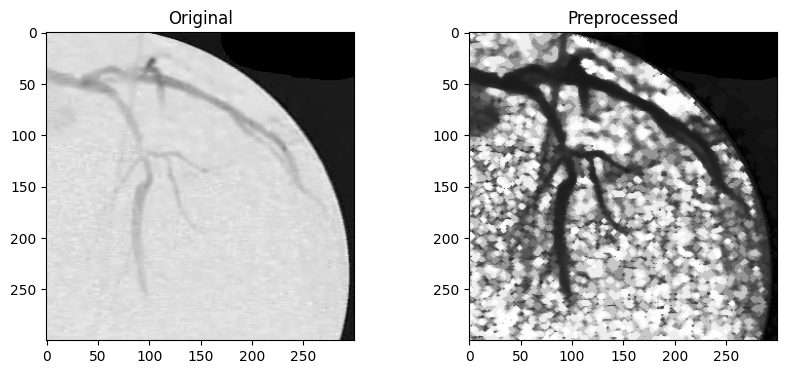

In [1055]:
hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 255])

# Aplicar erosión y dilatación
erosion = mo.erosion(image, mo.disk(2))
dilatation = mo.dilation(erosion, mo.disk(2))

# Ecualizar la imagen
equalized = exposure.equalize_hist(dilatation)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(equalized, cmap='gray')
plt.title('Preprocessed')
plt.show()

## Niblack

In [1056]:
def niblack_thresholding(image, window_size=15, k=-0.2):
    x, y = image.shape
    threshold = np.zeros((x, y), dtype=np.uint8)
    
    for i in range(x):
        for j in range(y):
            x1 = max(0, i - window_size // 2)
            x2 = min(x, i + window_size // 2)
            y1 = max(0, j - window_size // 2)
            y2 = min(y, j + window_size // 2)
            
            window = image[x1:x2, y1:y2]
            mean = np.mean(window)
            std = np.std(window)
            
            threshold[i, j] = mean - k * std
            
    return threshold

In [1057]:

threshold = niblack_thresholding(image, window_size=21, k=0.2)
binary = image < threshold

In [1058]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology
from scipy.ndimage import prewitt, laplace, mean, median_filter

def binarize_arteries(image):
    I = image
    
    # Eliminar ruido con filtro de mediana
    I = median_filter(I, size=1)
    
    # Aplicar filtro gausiano para suavizar la imagen
    I = filters.gaussian(I, sigma=2)
    
    # Aplicar filtro de Laplace para detectar bordes
    I = laplace(I)
    # Aplicar umbralización de Otsu
    # threshold = filters.threshold_otsu(I)
    # I = I > threshold
    
    # Aplicar operaciones morfológicas para mejorar los bordes
    # SP = morphology.disk(1)
    # I = morphology.erosion(I, SP)  # Hacer los bordes más finos
    
    # SP = mo.disk(2)
    # I = morphology.dilation(I, SP)  # Hacer los bordes más gruesos
    
    
    return I

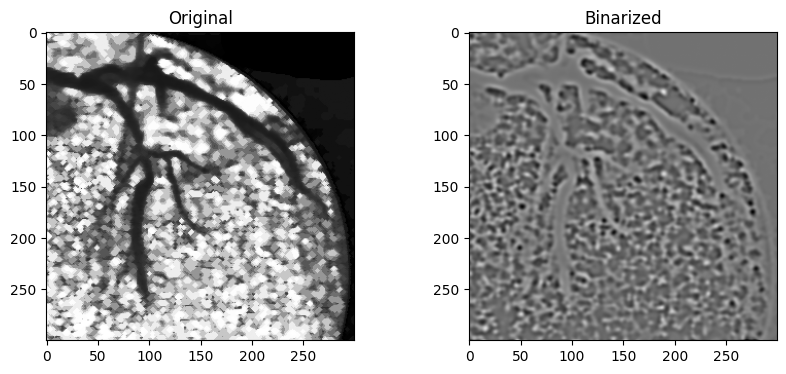

In [1059]:
binarized = binarize_arteries(equalized)
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(equalized, cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(binarized, cmap='gray')
plt.title('Binarized')
plt.show()

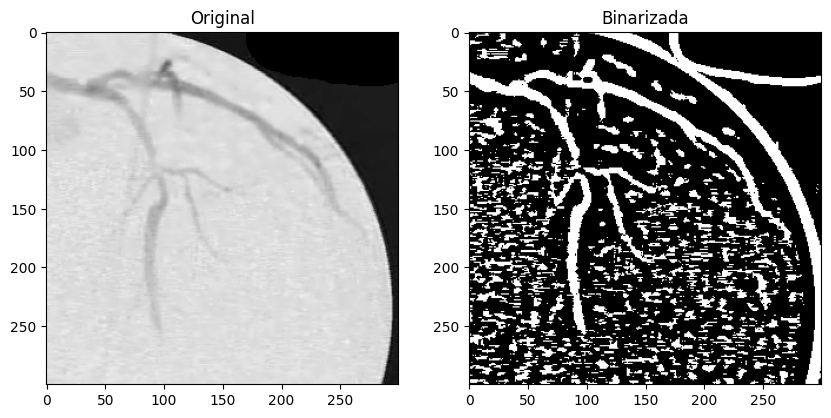

In [1060]:


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Binarizada')
plt.imshow(binary, cmap='gray')
plt.show()

## Post procesamiento

## Resultados 

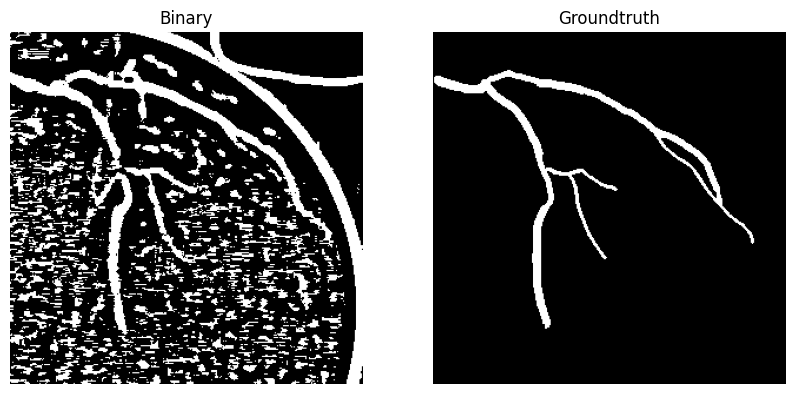

In [1061]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title('Binary')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_groundtruth, cmap='gray')
plt.title('Groundtruth')
plt.axis('off')

plt.show()

## Métricas